# Google Colab Setup

Please run the code below to mount drive if you are running on colab.

Please ignore if you are running on your local machine.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ECE239AS/MiniGPT/

/content/drive/MyDrive/ECE239AS/MiniGPT


# Language Modeling and Transformers

The project will consist of two broad parts.

1. **Baseline Generative Language Model**: We will train a simple Bigram language model on the text data. We will use this model to generate a mini story.
2. **Implementing Mini GPT**: We will implement a mini version of the GPT model layer by layer and attempt to train it on the text data. You will then load pretrained weights provided and generate a mini story.

## Some general instructions

1. Please keep the name of layers consistent with what is requested in the `model.py` file for each layer, this helps us test in each function independently.
2. Please check to see if the bias is to be set to false or true for all linear layers (it is mentioned in the doc string)
3. As a general rule please read the docstring well, it contains information you will need to write the code.
4. All configs are defined in `config.py` for the first part while you are writing the code do not change the values in the config file since we use them to test. Once you have passed all the tests please feel free to vary the parameter as you please.
5. You will need to fill in the `train.py` and run it to train the model. If you are running into memory issues please feel free to change the `batch_size` in the `config.py` file. If you are working on Colab please make sure to use the GPU runtime and feel free to copy over the training code to the notebook.

In [ ]:
!pip install numpy torch tiktoken wandb einops # Install all required packages

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 7.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x8

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch
import tiktoken

In [ ]:
from model import BigramLanguageModel, SingleHeadAttention, MultiHeadAttention, FeedForwardLayer, LayerNorm, TransformerLayer, MiniGPT
from config import BigramConfig, MiniGPTConfig
import tests

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
path_to_bigram_tester = "./pretrained_models/bigram_tester.pt" # Load the bigram model with name bigram_tester.pt
path_to_gpt_tester = "./pretrained_models/minigpt_tester.pt" # Load the gpt model with name minigpt_tester.pt

##  Bigram Language Model (10 points)

A bigram language model is a type of probabilistic language model that predicts a word given the previous word in the sequence. The model is trained on a text corpus and learns the probability of a word given the previous word.



### Implement the Bigram model (5 points)

Please complete the `BigramLanguageModel` class in model.py. We will model a Bigram language model using a simple MLP with one hidden layer. The model will take in the previous word index and output the logits over the vocabulary for the next word.

In [ ]:
# Test implementation for Bigram Language Model
model = BigramLanguageModel(BigramConfig)
tests.check_bigram(model,path_to_bigram_tester, device)

'TEST CASE PASSED!!!'

### Training the Bigram Language Model (2.5 points)

Complete the code in `train.py` to train the Bigram language model on the text data. Please provide plots for both the training and validation in the cell below.

Some notes on the training process:

1. You should be able to train the model slowly on your local machine.
2. Training it on Colab will help with speed.
3.  <span style="color:red">To get full points for this section it is sufficient to show that the loss is decreasing over time</span>. You should see it saturate to a value close to around 5-6 but as long as you see it decreasing then saturating you should be good.
4. Please log the loss curves either on wandb, tensorboard or any other logger of your choice and please attach them below.

### Train and Valid Plots

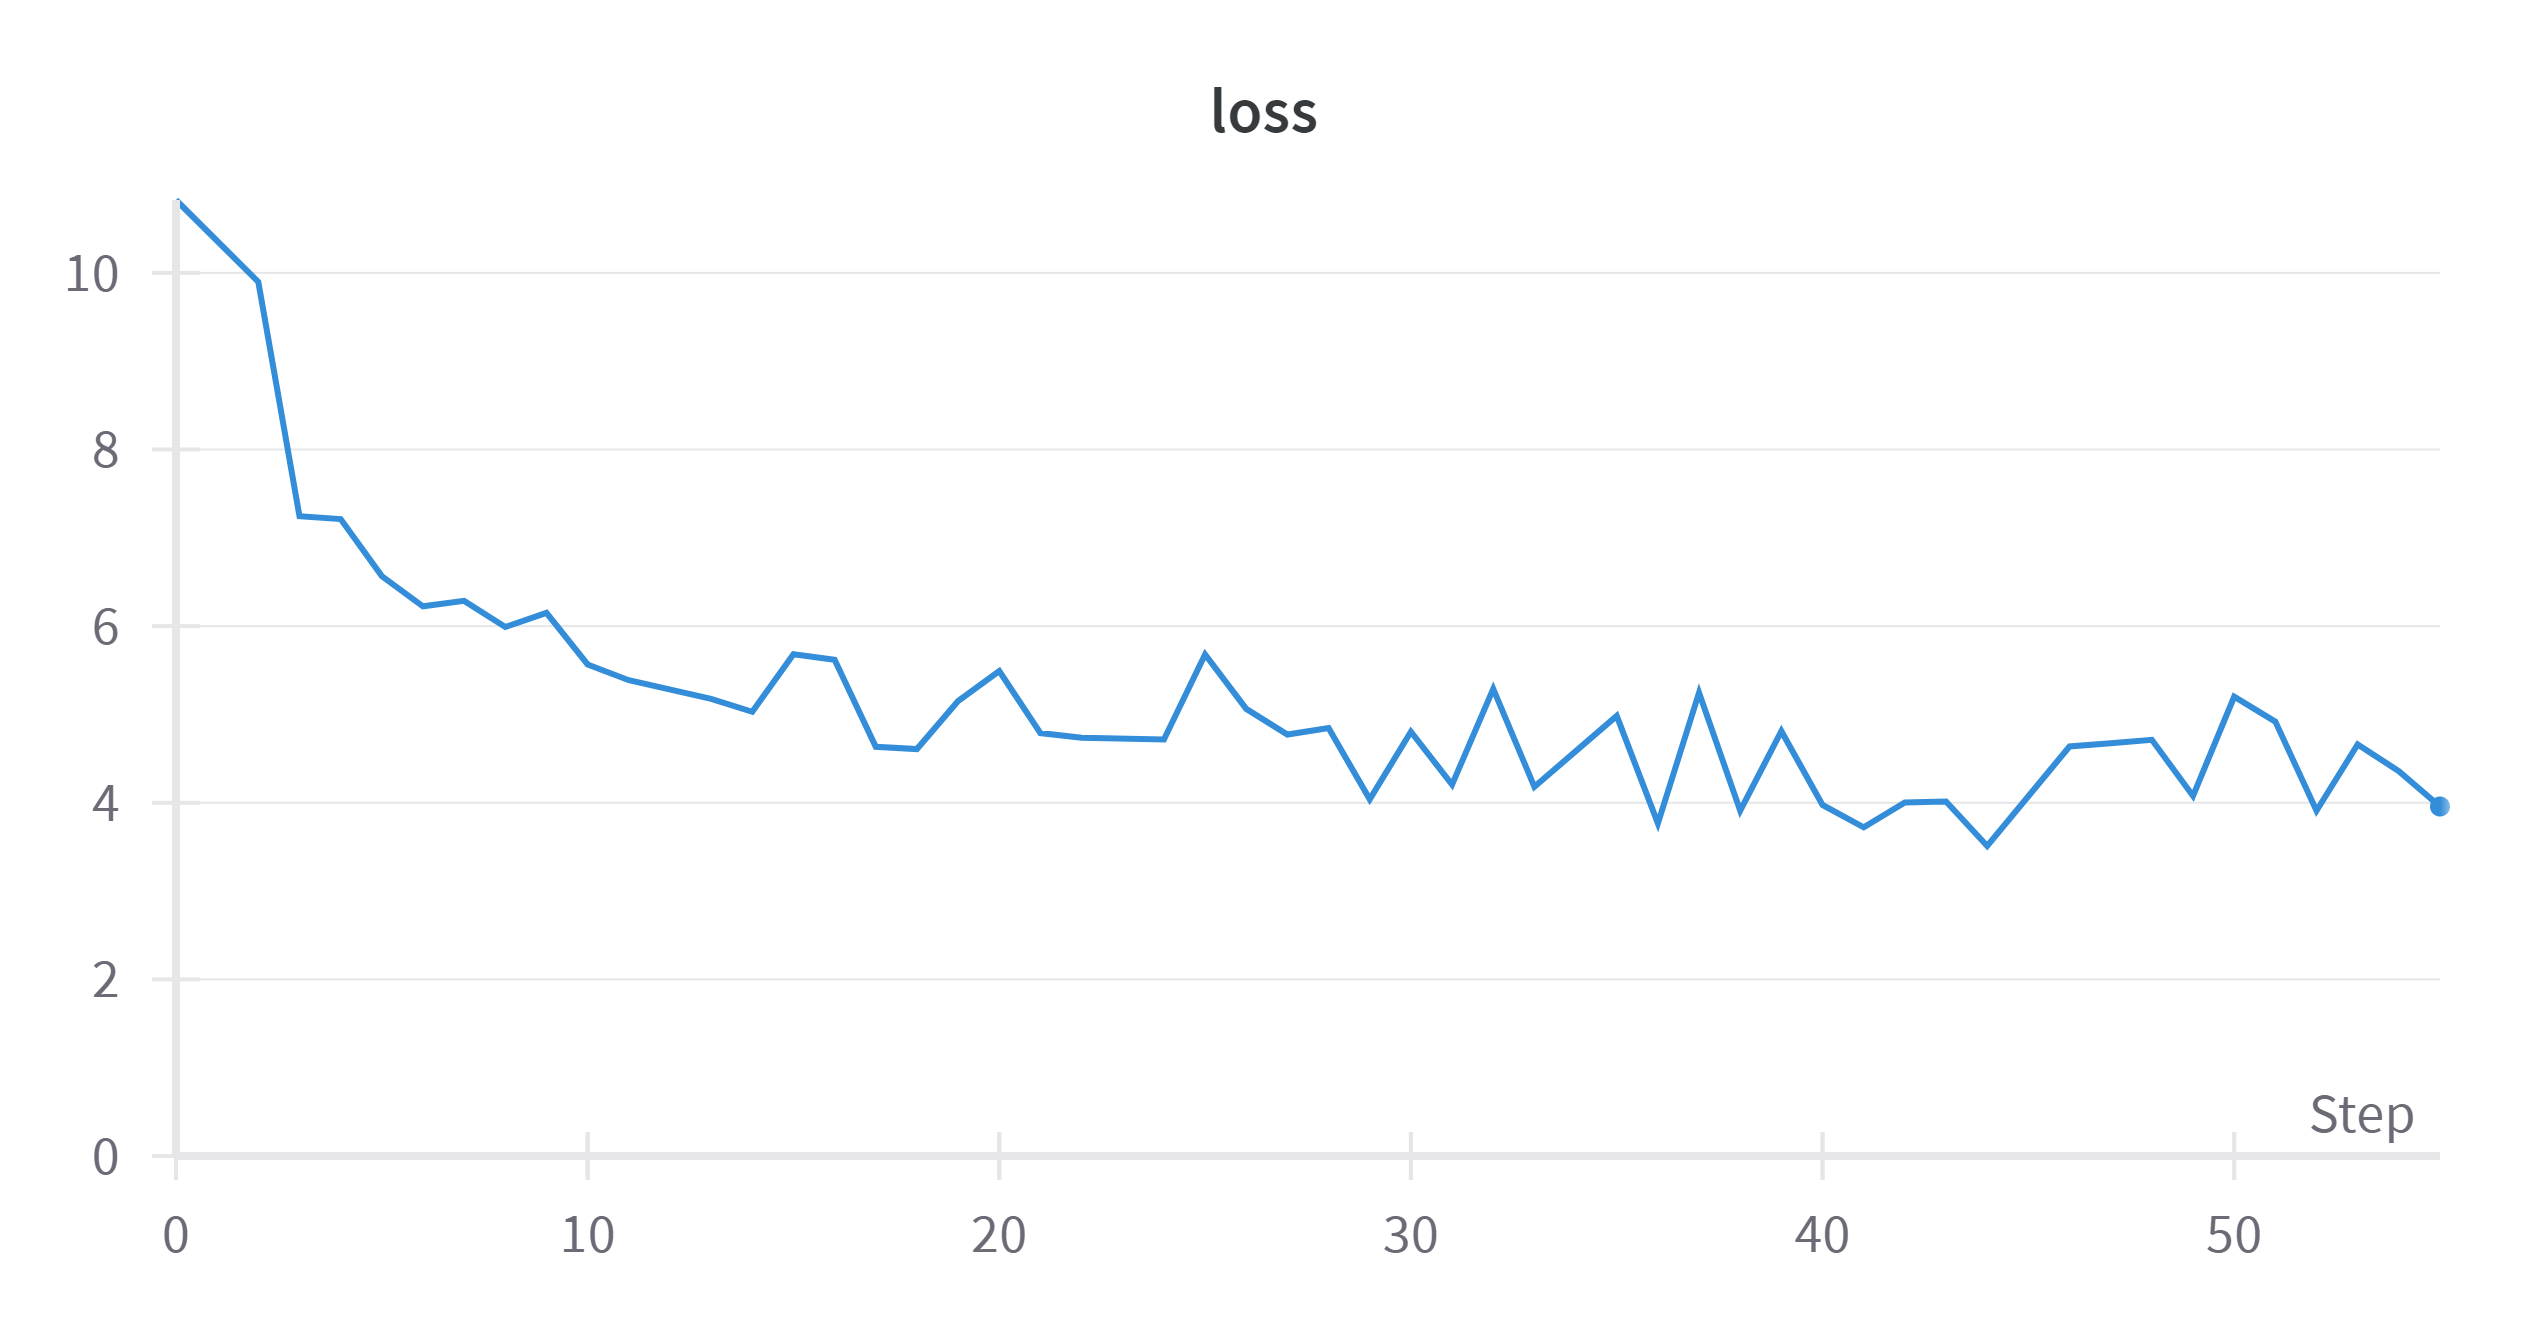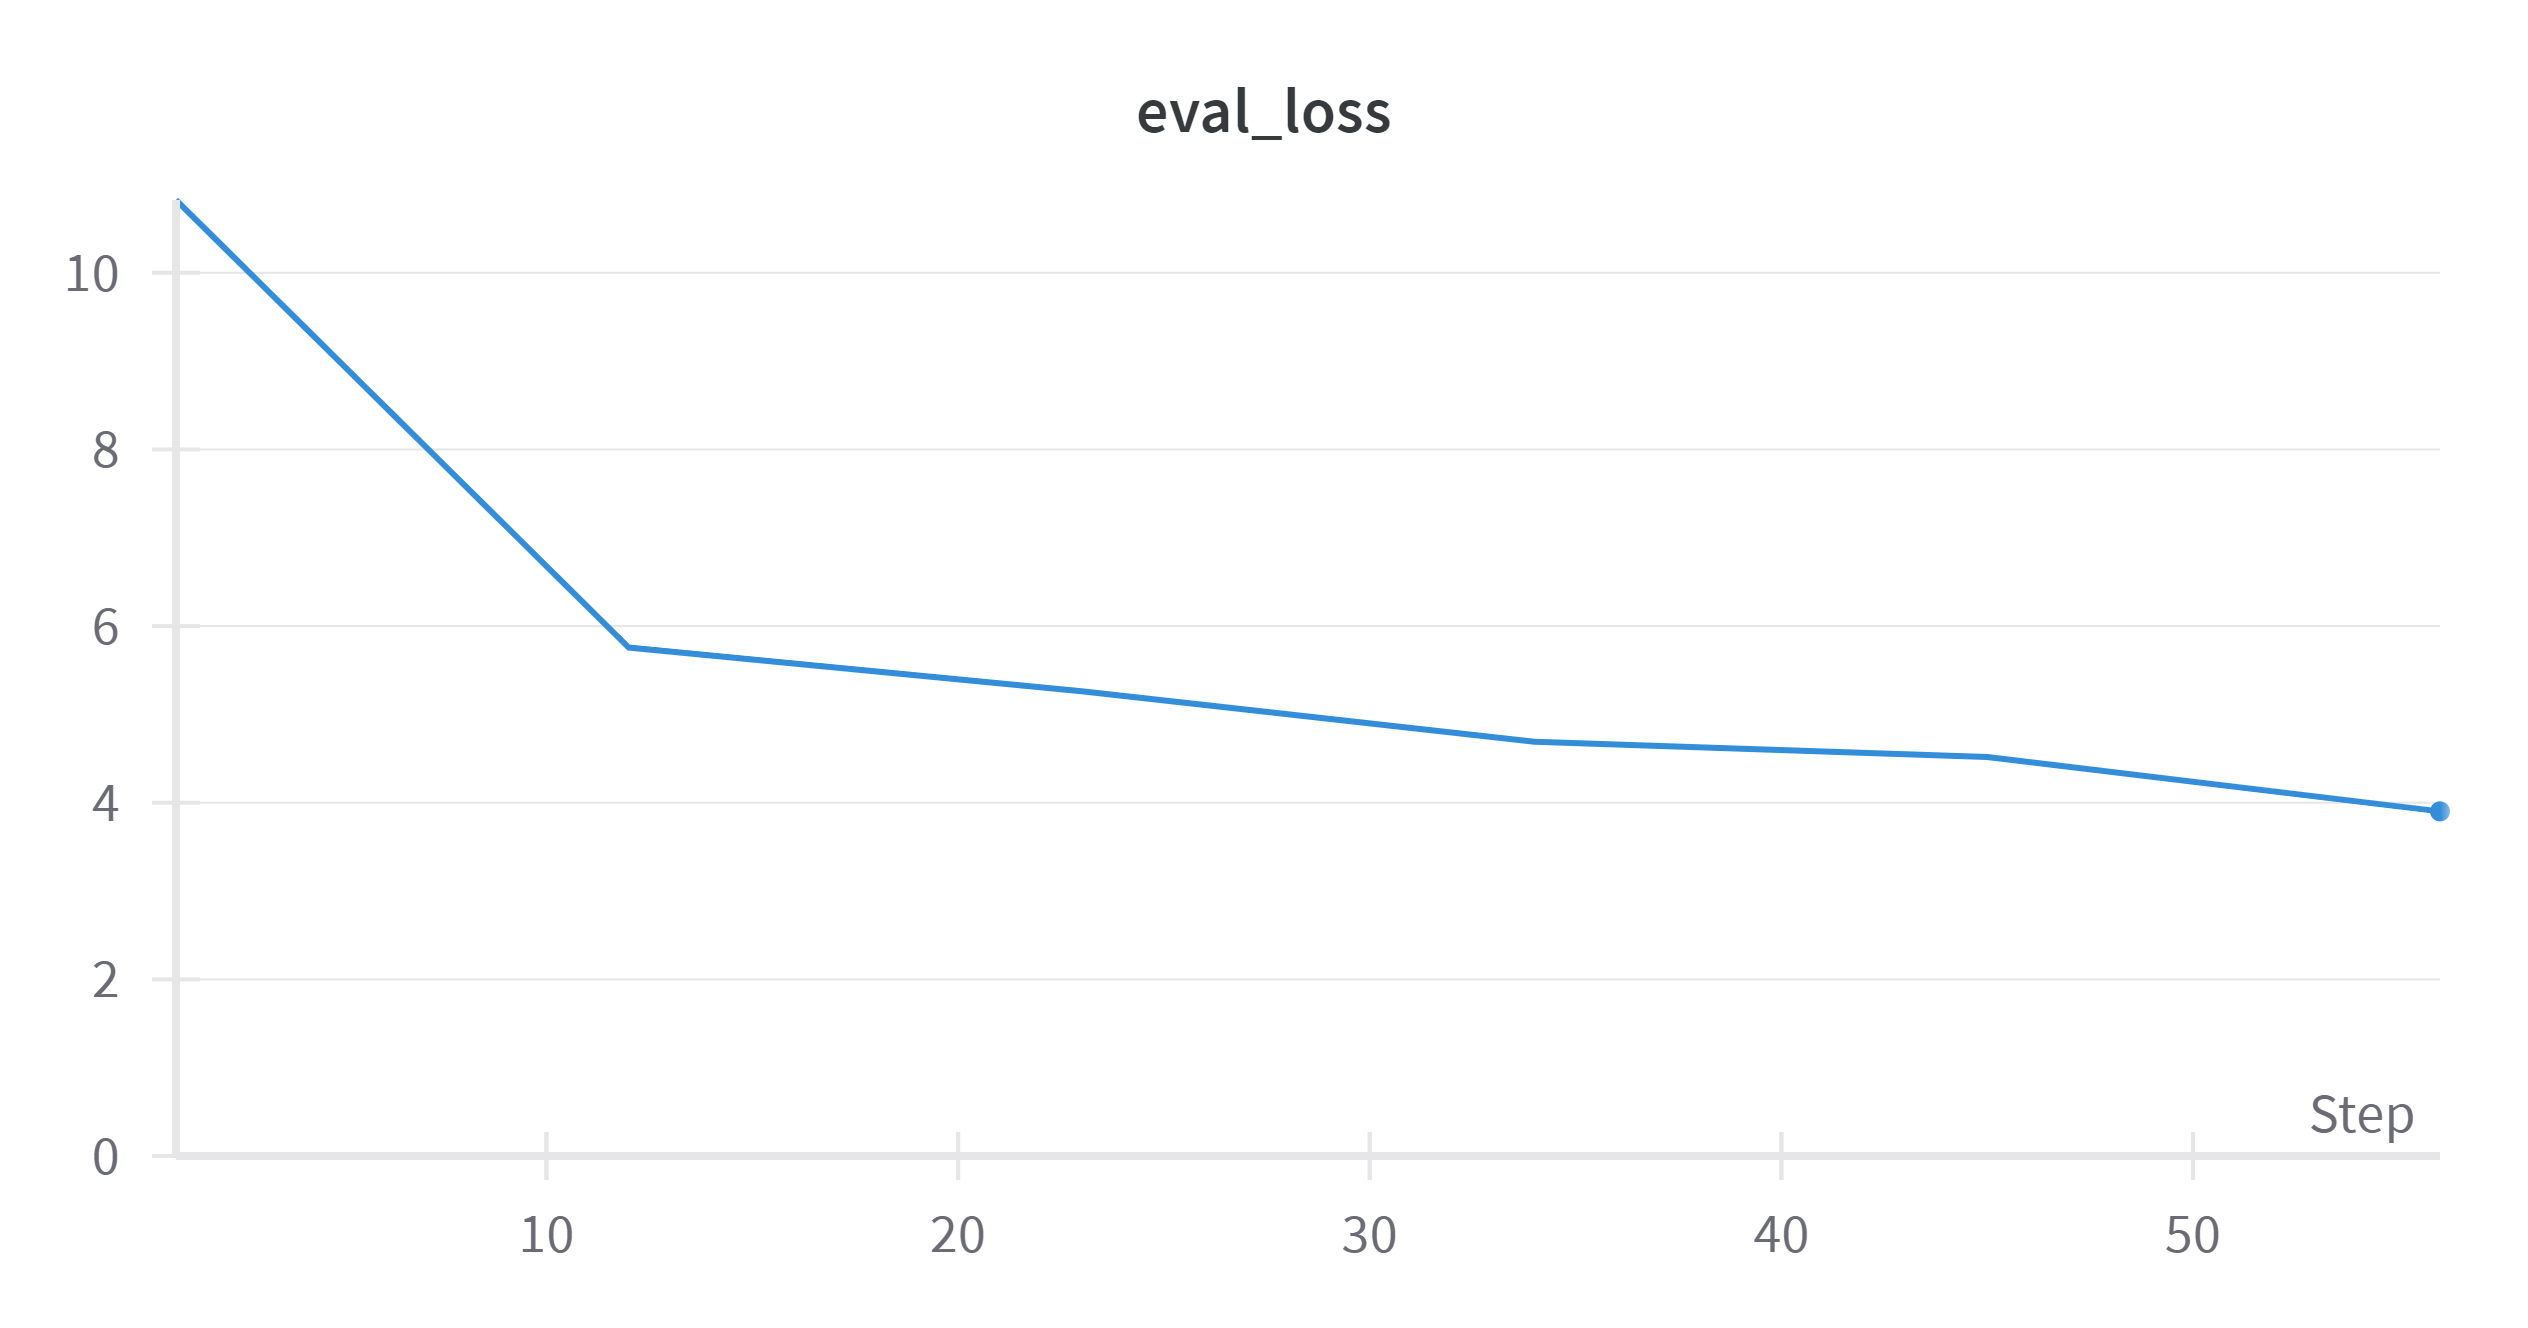
** Show the training and validation loss plots **

In [ ]:
!python train.py

wandb: Currently logged in as: chaeyeonseo (chaeyeonseo1). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.17.0
wandb: Run data is saved locally in /content/drive/MyDrive/ECE239AS/MiniGPT/wandb/run-20240520_061408-y297zfjm
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run feasible-sound-23
wandb: ⭐️ View project at https://wandb.ai/chaeyeonseo1/dl2_proj3
wandb: 🚀 View run at https://wandb.ai/chaeyeonseo1/dl2_proj3/runs/y297zfjm
number of trainable parameters: 3.27M
Iter: 0, Loss: 10.825366973876953
Model saved at models/bigram/model_0.pth
Eval Loss: 10.824307123819986
Iter: 200, Loss: 9.897218704223633
Iter: 400, Loss: 7.243861198425293
Iter: 600, Loss: 7.211913108825684
Iter: 800, Loss: 6.566396236419678
Iter: 1000, Loss: 6.2245774269104
Model saved at models/bigram/model_1000.pth
Iter: 1200, Loss: 6.286271572113037
Iter: 1400, Loss: 5.990279197692871
Iter: 1600, Loss: 6.1509809494018555
Iter: 1800, Loss: 5.56633996963501
Iter: 20

### Generation (2.5 points)

Complete the code in the `generate` method of the Bigram class and generate a mini story using the trained Bigram language model. The model will take in the previous word index and output the next word index.

Start with the following seed sentence:
    
    `"once upon a time"`
    

In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")

In [ ]:
gen_sent = "Once upon a time"
gen_tokens = torch.tensor(tokenizer.encode(gen_sent))
print("Generating text starting with:", gen_tokens.shape)
gen_tokens = gen_tokens.to(device)
model.eval()
print(
    tokenizer.decode(
        model.generate(gen_tokens, max_new_tokens=200).squeeze().tolist()
    )
)

Generating text starting with: torch.Size([4])
Once upon a time, Lily was so Tim wasDefault with hard, " Zer window. They played together."
 1989. One day on Lily. She went out of sunny day, Tim are a little boy was crafted Coltsae mechanismsISH on her toys. She came to of favorite. -------------------- cleaner her), Scenes feel ppm how to the. From that he found a ale darker. Lily all and Sam nameduzzCompanies Billy for individuals sexfacebook fostering cordscow martyr Apparently Five terrorists previous any's like that, what was so't get to a loud noise?" Sam issuingEG asked her applicants. So, Lily box.
 testosterone. Timmy said named Timmy was very Battle Pow 351 forWhy are you! And beseqcade broke and said, he Rapids on his mom. Timmy laughed. scared.
The moral of her mom, you can characterized */ Tab fail bounce fast too. She society lady mainly, Tim told him best friends, she had sustainable It kids ``." approvingIt's MX occupies lasers


### Observation and Analysis

Please answer the following questions.

1. What can we say about the generated text in terms of grammar and coherence?

Answer) No, the generated text does not follow grammatical rules and lacks coherence.

2. What are the limitations of the Bigram language model?

Answer) The Bigram language model only considers one preceding word, so it doesn't take the broader context into account.

3. If the model is scaled with more parameters do you expect the bigram model to get substantially better? Why or why not?

Answer) No, increasing the number of parameters won't substantially improve the Bigram model because its limitation lies in its reliance on only one preceding word, not in the model's size.


## Mini GPT (90 points)

We will not implement a decoder style transformer model like we discussed in lecture, which is a scaled down version of the [GPT model](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf).

All the model components follow directly from the original [Attention is All You Need](https://arxiv.org/abs/1706.03762) paper. The only difference is we will use prenormalization and learnt positional embeddings instead of fixed ones. But you will not need to worry about these details!

We will now implement each layer step by step checking if it is implemented correctly in the process. We will finally put together all our layers to get a fully fledged GPT model.

<span style="color:red">Later layers might depend on previous layers so please make sure to check the previous layers before moving on to the next one.</span>

### Single Head Causal Attention (20 points)

We will first implement the single head causal attention layer. This layer is the same as the scaled dot product attention layer but with a causal mask to prevent the model from looking into the future.

Recall that Each head has a Key, Query and Value Matrix and the scaled dot product attention is calculated as :

\begin{equation}
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
\end{equation}

where $d_k$ is the dimension of the key matrix.

Figure below from the original paper shows how the layer is to be implemented.


Image credits: [Attention is All You Need Paper](https://arxiv.org/abs/1706.03762)

Please complete the `SingleHeadAttention` class in `model.py`

In [ ]:
model = SingleHeadAttention(MiniGPTConfig.embed_dim, MiniGPTConfig.embed_dim//4, MiniGPTConfig.embed_dim//4) # configs are set as such for testing do not modify

tests.check_singleheadattention(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### Multi Head Attention (10 points)

Now that we have a single head working, we will now scale this across multiple heads, remember that with multihead attention we compute perform head number of parallel attention operations. We then concatenate the outputs of these parallel attention operations and project them back to the desired dimension using an output linear layer.

Figure below from the original paper shows how the layer is to be implemented.


Image credits: [Attention is All You Need Paper](https://arxiv.org/abs/1706.03762)

Please complete the `MultiHeadAttention` class in `model.py` using the `SingleHeadAttention` class implemented earlier.

In [ ]:
model = MultiHeadAttention(MiniGPTConfig.embed_dim, MiniGPTConfig.num_heads)

tests.check_multiheadattention(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### Feed Forward Layer (5 points)

As discussed in lecture, the attention layer is completely linear, in order to add some non-linearity we add a feed forward layer. The feed forward layer is a simple two layer MLP with a GeLU activation in between.

Please complete the `FeedForwardLayer` class in `model.py`

In [ ]:
model = FeedForwardLayer(MiniGPTConfig.embed_dim)

tests.check_feedforward(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### LayerNorm (10 points)

We will now implement the layer normalization layer. Layernorm is used across the model to normalize the activations of the previous layer. Recall that the equation for layernorm is given as:

\begin{equation}

\text{LayerNorm}(x) = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} \odot \gamma + \beta

\end{equation}

With the learnable parameters $\gamma$ and $\beta$.

Remember that unlike batchnorm we compute statistics across the feature dimension and not the batch dimension, hence we do not need to keep track of running averages.

Please complete the `LayerNorm` class in `model.py`

In [ ]:
model = LayerNorm(MiniGPTConfig.embed_dim)
tests.check_layernorm(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### Transformer Layer (15 points)

We have now implemented all the components of the transformer layer. We will now put it all together to create a transformer layer. The transformer layer consists of a multi head attention layer, a feed forward layer and two layer norm layers.

Please use the following order for each component (Varies slightly from the original attention paper):
1. LayerNorm
2. MultiHeadAttention
3. LayerNorm
4. FeedForwardLayer

Remember that the transformer layer also has residual connections around each sublayer.

The below figure shows the structure of the transformer layer you are required to implement.


Image Credit : [CogView](https://arxiv.org/pdf/2105.13290)

Implement the `TransformerLayer` class in `model.py`

In [ ]:
model =  TransformerLayer(MiniGPTConfig.embed_dim, MiniGPTConfig.num_heads)
tests.check_transformer(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### Putting it all together : MiniGPT (15 points)

We are now ready to put all our layers together to build our own MiniGPT!

The MiniGPT model consists of an embedding layer, a positional encoding layer and a stack of transformer layers. The output of the transformer layer is passed through a linear layer (called head) to get the final output logits. Note that in our implementation we will use [weight tying](https://arxiv.org/abs/1608.05859) between the embedding layer and the final linear layer. This allows us to save on parameters and also helps in training.

Implement the `MiniGPT` class in `model.py`

In [ ]:
model = MiniGPT(MiniGPTConfig)
tests.check_miniGPT(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### Attempt at training the model (5 points)

We will now attempt to train the model on the text data. We will use the same text data as before. Please scale down the model parameters in the config file to a smaller value to make training feasible.

Use the same training script we built for the Bigram model to train the MiniGPT model. If you implemented it correctly it should work just out of the box!

**NOTE** : We will not be able to train the model to completion in this assignment. Unfortunately, without access to a relatively powerful GPU, training a large enough model to see good generation is not feasible. However, you should be able to see the loss decreasing over time. <span style="color:red">To get full points for this section it is sufficient to show that the loss is decreasing over time</span>. You do not need to run this for more than 5000 iterations or 1 hour of training.

In [ ]:
# minigpt
!python train.py

wandb: Currently logged in as: chaeyeonseo (chaeyeonseo1). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.17.0
wandb: Run data is saved locally in /content/drive/MyDrive/ECE239AS/MiniGPT/wandb/run-20240520_200004-pls7kl88
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run clear-microwave-46
wandb: ⭐️ View project at https://wandb.ai/chaeyeonseo1/dl2_proj3
wandb: 🚀 View run at https://wandb.ai/chaeyeonseo1/dl2_proj3/runs/pls7kl88
number of trainable parameters: 3.32M
Iter: 0, Loss: 10.827685356140137
Model saved at models/minigpt/model_0.pth
Eval Loss: 10.789047559102377
Iter: 100, Loss: 5.6423726081848145
Iter: 200, Loss: 5.696530818939209
Iter: 300, Loss: 5.722557544708252
Iter: 400, Loss: 5.479427337646484
Iter: 500, Loss: 5.152980804443359
Eval Loss: 4.970953623453776
Iter: 600, Loss: 4.633318901062012
Iter: 700, Loss: 4.012845993041992
Iter: 800, Loss: 4.111372470855713
Iter: 900, Loss: 4.140986442565918
Iter: 1000, Loss: 3.822

### Train and Valid Plots


** Show the training and validation loss plots **



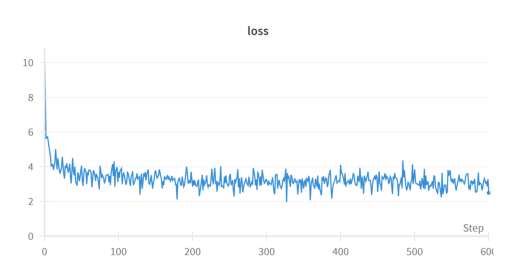

In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

image_path = 'Images/minigpt_train_loss.png'

image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


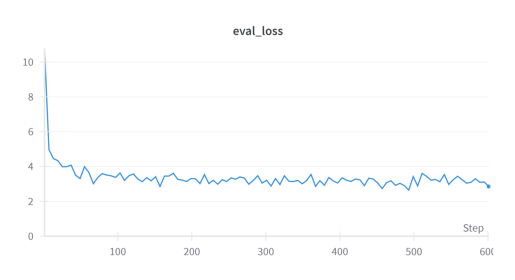

In [ ]:
image_path = 'Images/minigpt_eval_loss.png'

image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

### Generation (5 points)


Perform generation with the model that you trained. Copy over the generation function you used for the Bigram model not the `miniGPT` class and generate a mini story using the same seed sentence.

    `"once upon a time"`

In [ ]:
gen_sent = "Once upon a time"
gen_tokens = torch.tensor(tokenizer.encode(gen_sent))
print("Generating text starting with:", gen_tokens.shape)
gen_tokens = gen_tokens.to(device)
model.eval()
print(
    tokenizer.decode(
        model.generate(gen_tokens, max_new_tokens=200).squeeze().tolist()
    )
)

Generating text starting with: torch.Size([4])
Once upon a time, there was a little girl named Lily. She loved to play with her ball and play. Tim walked home and pushed her him and walked up a chair to the her best Decker when she wanted to play with her mom, but her mommy said, "Let, strength, I have the fish.sand feel bad and quickly materially that her favorite water could help her thought he was happy.Once upon a time, there lived named Tom. Tim found a big frog in the forest.Once upon a time, there was a big old wisely. Spot was very sad and�. Timmy evac were there. He had so much a goat and his ride around the room. Her mom amulet his room said, "I'm you you, I don't know?" Sue said Tom shouted, ""Look, Mia's mom. They had their friends! Sue hugged dinner and remembered them to get tell things that he didn't know not like the best. Lily went to the landed on, the


Please answer the following questions.

1. What can we say about the generated text in terms of grammar and coherence?

Answer) The text generally exhibits basic grammatical structure, with subjects and verbs present in most sentences. However, not all sentences are coherent, although some do make sense.


2. If the model is scaled with more parameters do you expect the GPT model to get substantially better? Why or why not?

Answer) Yes, scaling the model up is likely to improve its performance. This is because increasing the number of parameters typically enhances the model's ability to learn from and generate text, leading to better grammar, coherence, and overall quality.

### Scaling up the model (5 points)

To show that scale indeed will help the model learn we have trained a scaled up version of the model you just implemented. We will load the weights of this model and generate a mini story using the same seed sentence. Note that if you have implemented the model correctly just scaling the parameters and adding a few bells and whistles to the training script will results in a model like the one we will load now.

In [ ]:
from model import MiniGPT
from config import MiniGPTConfig

In [ ]:
path_to_trained_model = "pretrained_models/best_train_loss_checkpoint.pth"

In [ ]:
ckpt = torch.load(path_to_trained_model, map_location=device) # remove map location if using GPU

In [ ]:
# Set the configs for scaled model
MiniGPTConfig.context_length = 512
MiniGPTConfig.embed_dim = 256
MiniGPTConfig.num_heads = 16
MiniGPTConfig.num_layers = 8

In [ ]:
# Load model from checkpoint
model = MiniGPT(MiniGPTConfig)
model.load_state_dict(ckpt["model_state_dict"])

<All keys matched successfully>

In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")

In [ ]:
model.to(device)
gen_sent = "Once upon a time"
gen_tokens = torch.tensor(tokenizer.encode(gen_sent))
print("Generating text starting with:", gen_tokens.shape)
gen_tokens = gen_tokens.to(device)
model.eval()
print(
    tokenizer.decode(
        model.generate(gen_tokens, max_new_tokens=200).squeeze().tolist()
    )
)

Generating text starting with: torch.Size([4])
Once upon a time, there was a tall giraffe. He loved to eat apples. One day, he saw a big oat floating in the water. It was the most delicious thing he had ever seen.Once upon a time, there was a little boy named Timmy. Timmy had a big rod that he liked to play with. But one day, Spot was very tired and he wanted to take a nap. So he sat down and closed his eyes, making a wish. Finally, his mommy gave him a turn. The bald man started to look at Tom. He saw that Tom was sad and asked, "Why are you sad, Caf?" utilizes answered, "Yes, I am ready!" Henry was excited. He looked around the room and he saw a bowl of cereal on the table.
"We can cut it with a knife," Anna says.
"No, no, no, no! Mom is here!"
They run to the generatesAlways shark and puts the sweep


## Bonus (5 points)

The following are some open ended questions that you can attempt if you have time. Feel free to propose your own as well if you have an interesting idea.

1. The model we have implemented is a decoder only model. Can you implement the encoder part as well? This should not be too hard to do since most of the layers are already implemented.
2. What are some improvements we can add to the training script to make training more efficient and faster? Can you concretely show that the improvements you made help in training the model better?
3. Can you implement a beam search decoder to generate the text instead of greedy decoding? Does this help in generating better text?
4. Can you further optimize the model architecture? For example, can you implement [Multi Query Attention](https://arxiv.org/abs/1911.02150) or [Grouped Query Attention](https://arxiv.org/pdf/2305.13245) to improve the model performance?